### importing cleaner version of data

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("C://Users//Other users//datascience//projects//data analysis//Air Bnb//Data//preprocessed data//airbnb_cleaned.csv")
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,listing_count,availability_365,price_boxcox,reviews_per_month_boxcox
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,5.747923,5.747923
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,6.290030,6.290030
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,5.756616,5.756616
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,58,4.64,1,194,5.088796,5.088796
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,4.955078,4.955078


# PRICE ANALYSIS
major factors that effects prices are:
- neighbourhood_group
- min nights
- room type

**Distribution of price data**

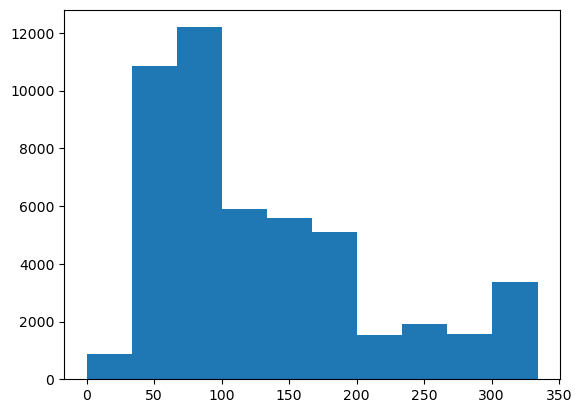

In [24]:
import matplotlib.pyplot as plt
plt.hist(df["price"])
plt.show()

**Analysis of avg price based on neighbourhood_group**

In [25]:
g=df.groupby("neighbourhood_group")
for i,j in g:
    print("mean avg prices of ",i," is:",j["price"].mean())

mean avg prices of  Bronx  is: 82.30522456461962
mean avg prices of  Brooklyn  is: 113.53393372474874
mean avg prices of  Manhattan  is: 164.65841607019163
mean avg prices of  Queens  is: 93.16101694915254
mean avg prices of  Staten Island  is: 94.48525469168901


**Analysis of avg price based on minimum nights**

In [26]:
g=df.groupby("minimum_nights")
x=list()
y=list()
for i,j in g:
    # print("mean avg prices of ",i," is:",j["price"].mean())
    x.append(i)
    y.append(j["price"].mean())

**Analysis of avg price based on room_type**

In [27]:
g=df.groupby("room_type")
for i,j in g:
    print("mean avg prices of ",i," is:",j["price"].mean())

print("no of records present in private rooms: ",len(df[df["room_type"]=="Private room"]))
print("no of records present in Entire home/apt: ",len(df[df["room_type"]=="Entire home/apt"]))
print("no of records present in Shared room: ",len(df[df["room_type"]=="Shared room"]))

mean avg prices of  Entire home/apt  is: 180.21196850393702
mean avg prices of  Private room  is: 82.79217812024012
mean avg prices of  Shared room  is: 64.46419327006039
no of records present in private rooms:  22322
no of records present in Entire home/apt:  25400
no of records present in Shared room:  1159


## plots related to price

In [28]:
import seaborn as sns

<Axes: xlabel='room_type', ylabel='count'>

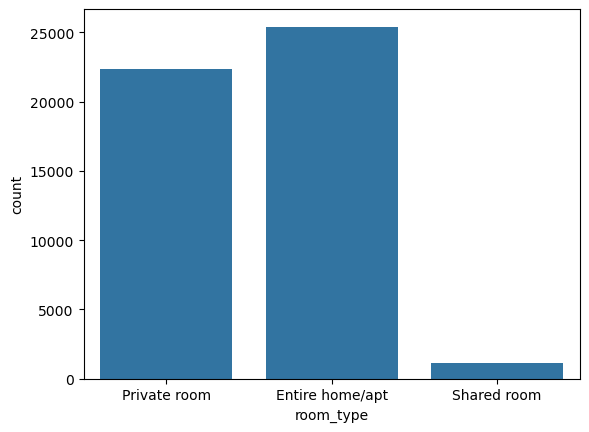

In [29]:
sns.countplot(x=df["room_type"])

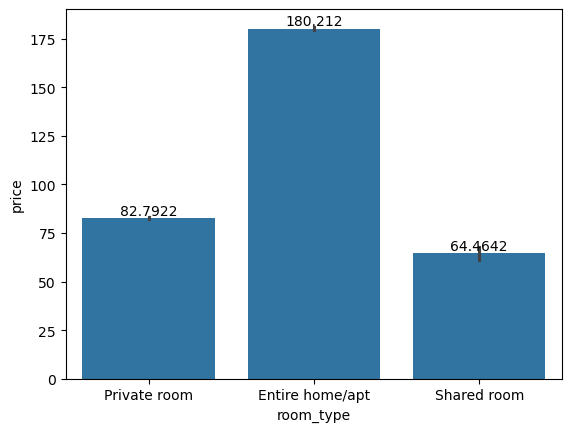

In [30]:
ax = sns.barplot(x="room_type", y="price", data=df) 
ax.bar_label(ax.containers[0])  
plt.show()

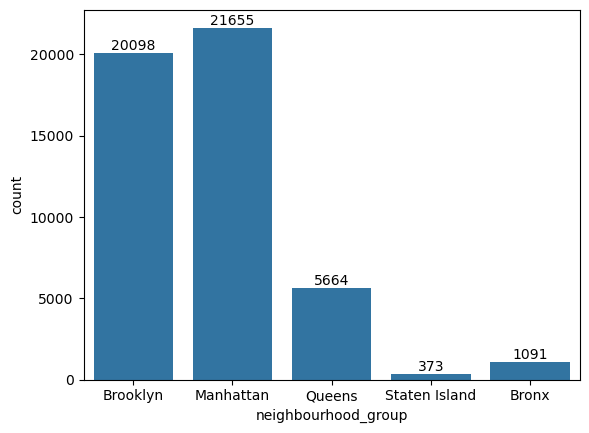

In [31]:
ax=sns.countplot(x=df["neighbourhood_group"])
ax.bar_label(ax.containers[0])
plt.show()

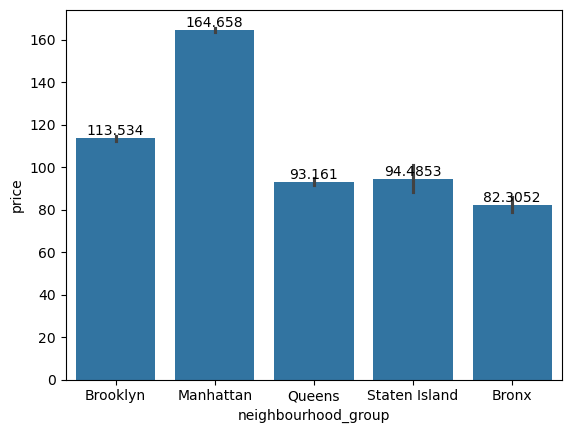

In [32]:
ax = sns.barplot(x="neighbourhood_group", y="price", data=df) 
ax.bar_label(ax.containers[0])  
plt.show()

In [33]:
df["types_of_vacations"]=pd.cut(df["minimum_nights"],bins=[0,7,30,365],labels=["short","medium","longer"])

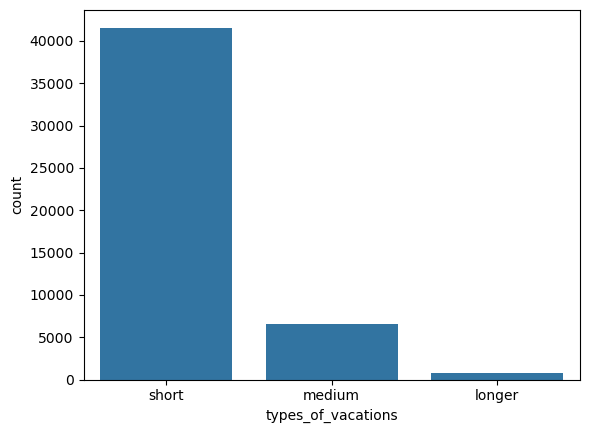

In [34]:
sns.countplot(x=df["types_of_vacations"])
plt.show()

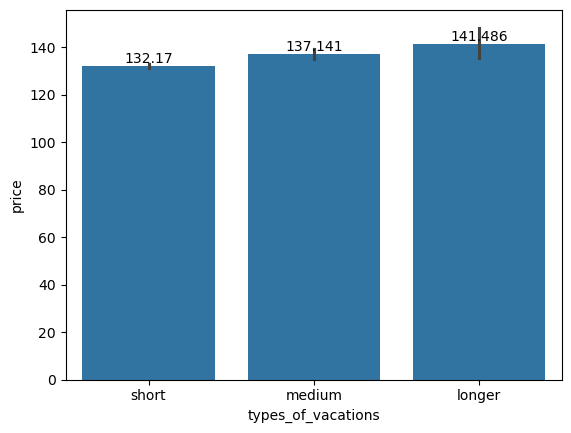

In [35]:
ax=sns.barplot(x=df["types_of_vacations"],y=df["price"])
ax.bar_label(ax.containers[0])
plt.show()

**Observations:**
- more amount of people prefer aibnb lisings between **50 to 100 dollars**
- mean of **manhattan is:164 dollars , brooklyn :113 dollars - so the listings here should maintain price grater than 100 dollars**
- prices of minimum nights from 1 to 6 increases gradually and decreases after 6 days
- As expected **renting out entire apt will be costly than private room & shared rooms.**
- more number of people are preffering = **{ private rooms,entire apts }**
- More number of people prefering private rooms and  entire home instead of shared rooms
- **avg price of entire home is double times of both private,shared room prices**
- **more people visiting manhattan,brookyln** to stay
- the avg price among all neighbourhood_group the highest is manhattan follwed by boorklyn
- **more people who are prefering to stay only shorter days 1 to 7 days**
- the avg price of shroter days staying is slightly less than medium & longer stays.But more people are visiting airbnb listings for shorter days.

## ANALYSIS OF DEMAND
determine which city is in high demand!

1)availabity should me minimum
2)listing counts should be maximum


In [36]:
g=df.groupby("neighbourhood_group")
for i,j in g:
    print(i," : ",j["availability_365"].mean())

Bronx  :  165.75893675527038
Brooklyn  :  100.17474375559758
Manhattan  :  111.9244978065112
Queens  :  144.42249293785312
Staten Island  :  199.67828418230562


In [37]:
g=df.groupby("neighbourhood_group")
for i,j in g:
    print(i," : ",j["reviews_per_month"].mean())

Bronx  :  1.8378310502283106
Brooklyn  :  1.2833586718559962
Manhattan  :  1.272277811184606
Queens  :  1.9415001093374151
Staten Island  :  1.872579617834395


In [38]:
g=df.groupby("neighbourhood_group")
for i,j in g:
    print(i," : ",j["price"].mean())

Bronx  :  82.30522456461962
Brooklyn  :  113.53393372474874
Manhattan  :  164.65841607019163
Queens  :  93.16101694915254
Staten Island  :  94.48525469168901


In [39]:
pd.crosstab(df["neighbourhood_group"],df["types_of_vacations"],margins=True)

types_of_vacations,short,medium,longer,All
neighbourhood_group,,,,
Bronx,1027,51,13,1091
Brooklyn,17630,2221,247,20098
Manhattan,17483,3756,416,21655
Queens,5075,536,53,5664
Staten Island,347,22,4,373
All,41562,6586,733,48881


In [40]:
pd.crosstab(df["neighbourhood_group"],df["room_type"],margins=True)

room_type,Entire home/apt,Private room,Shared room,All
neighbourhood_group,,,,
Bronx,379,652,60,1091
Brooklyn,9557,10128,413,20098
Manhattan,13194,7982,479,21655
Queens,2094,3372,198,5664
Staten Island,176,188,9,373
All,25400,22322,1159,48881


### Observations:
- Brooklyn,Manhattan has highest listings (coz of higher count of private ,apt rooms)
- Brooklyn,Mahattan has lowest availability (coz of higher count of private ,apt rooms)
- Brooklyn ,Manhanttan has higher shorter stays (so more people are coming for shorter vacations to stay)
- **Higher the enitire home/apt or private rooms demand will increase!** 
- But coming to reviews queens and staten isalnd has highest rate of review (cuz of low cost)

**Highest Demand Cities: Manhattan , Brooklyn**
- **Reason: Higher listings count,Low availability of days,Higher number of private,apt rooms.**

**Why other cities are less in Demand?**
- **Bronx:less number of listings(only 1091),no reviews(zero reviews) from (2011 to 2013)**
- **Queens: Year=2013 has '0' listings count and '0' reviews , because of that queens has slower rate of demand compared to demanded cities.**
- **Staten Island: less number of listings(only 373),no reviews(zero reviews) from (2011 to 2013)**

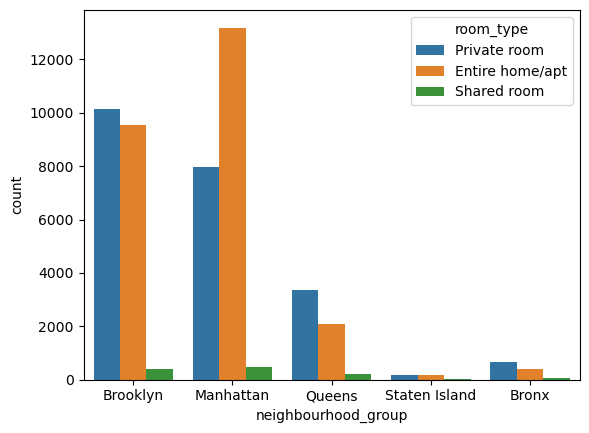

In [41]:
sns.countplot(x=df["neighbourhood_group"],hue=df["room_type"])
plt.show()

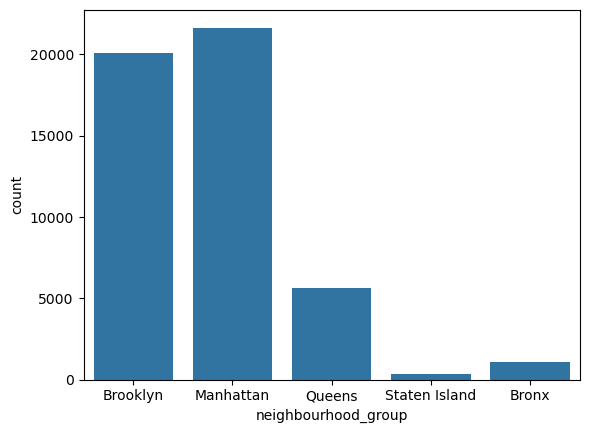

In [42]:
sns.countplot(x=df["neighbourhood_group"])
plt.show()

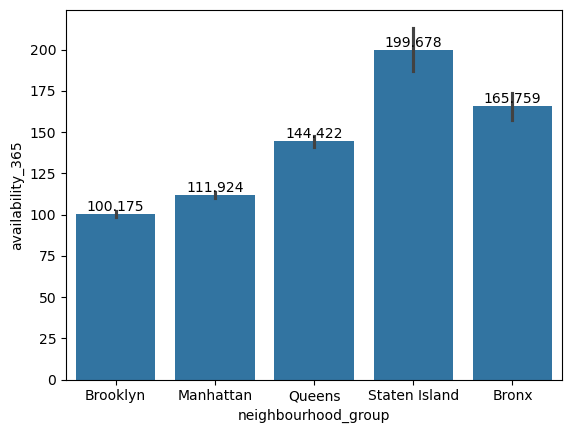

In [43]:
ax=sns.barplot(x=df["neighbourhood_group"],y=df["availability_365"])
ax.bar_label(ax.containers[0])
plt.show()

# DOES HIGH NUMBER OF REVIEWS EFFECTS PRICES?

In [44]:
temp=df[["price","number_of_reviews"]]
temp.corr()

,price,number_of_reviews
price,1.000000,-0.066421
number_of_reviews,-0.066421,1.000000


#### Observations:
- Here we can clearly see that number of reviews doesn't mean that listing has high cost!
- But we can observe that higher number of reviews are leading to low prices of listings.

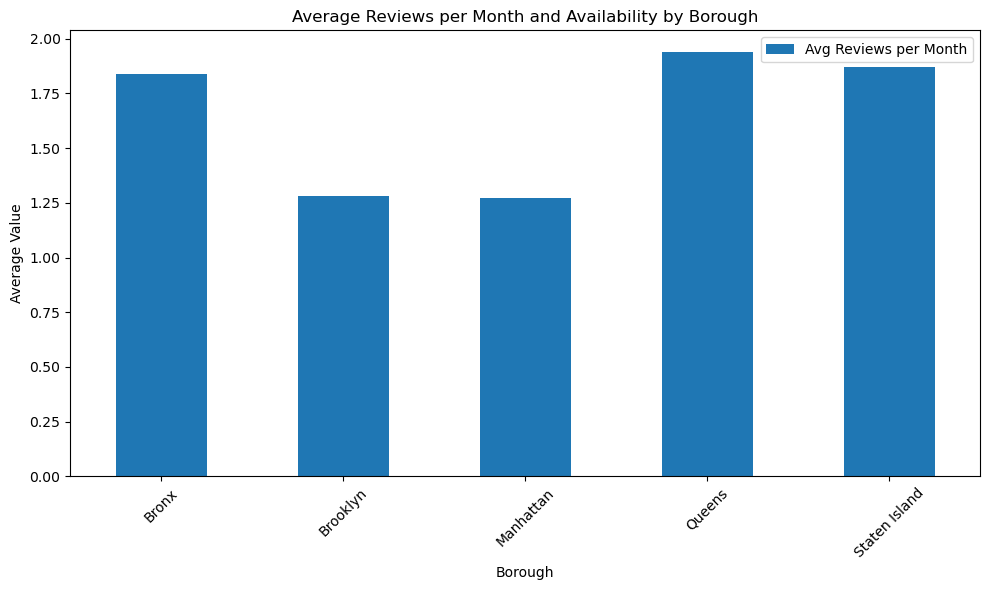

In [9]:
import matplotlib.pyplot as plt
borough_avg = df.groupby('neighbourhood_group')[['reviews_per_month']].mean()

# Plotting
borough_avg.plot(kind='bar', figsize=(10,6))
plt.title('Average Reviews per Month and Availability by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(['Avg Reviews per Month', 'Avg Availability (days)'])
plt.tight_layout()
plt.show()